In [1]:
import tensorflow as tf
from glob import glob
from os.path import join
from tensorflow.keras import layers, models
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imports.GDL_layers as GDL_layers

2022-06-16 15:07:07.648162: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Find a list of all the datafiles
patch_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/"
patch_files = sorted(glob(join(patch_path, "*.nc")))
patch_ds = xr.open_dataset(patch_files[0])
csv_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/"
csv_files = sorted(glob(join(csv_path, "track_step_*.csv")))
meta_ds = pd.read_csv(csv_files[0])

In [3]:
patch_ds

<xarray.Dataset>
Dimensions:           (p: 370, row: 144, col: 144)
Coordinates:
  * p                 (p) int32 0 1 2 3 4 5 6 7 ... 363 364 365 366 367 368 369
  * row               (row) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
  * col               (col) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables: (12/26)
    lon               (p, row, col) float32 ...
    lat               (p, row, col) float32 ...
    i                 (p, row, col) int32 ...
    j                 (p, row, col) int32 ...
    x                 (p, row, col) float32 ...
    y                 (p, row, col) float32 ...
    ...                ...
    MLCAPE_prev       (p, row, col) float32 ...
    USHR6_prev        (p, row, col) float32 ...
    VSHR6_prev        (p, row, col) float32 ...
    SBLCL_prev        (p, row, col) float32 ...
    U_BUNK_prev       (p, row, col) float32 ...
    V_BUNK_prev       (p, row, col) float32 ...
Attributes: (12/36)
    Conventions:             CF-1.6
    title:                   NCARSTORM Storm Patches for run 20101024-0000 me...
    object_variable:         REFL_COM
    start_hour:              12
    end_hour:                35
    HRRR_alt_end_hour:       46
    ...                      ...
    single_step:             True
    label_type:              gamma
    model_map_file:          /glade/work/cbecker/hagelslag/mapfiles/ncar_stor...
    mask_file:               None
    run_date_format:         %Y%m%d-%H%M
    json:                    False

In [4]:
meta_ds

,Step_ID,Track_ID,Ensemble_Name,Ensemble_Member,Run_Date,Valid_Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,...,eccentricity,major_axis_length,minor_axis_length,orientation,Matched,Max_Hail_Size,Num_Matches,Shape,Location,Scale
0,d01_REFL_COM_20101024-0000_12_13_000_00,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-98.41019,...,0.90735,51.23550,21.53869,1.41172,0,0,0,0,0,0
1,d01_REFL_COM_20101024-0000_12_13_000_01,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-97.69198,...,0.85356,26.92719,14.02906,1.13923,0,0,0,0,0,0
2,d01_REFL_COM_20101024-0000_12_12_001_00,d01_REFL_COM_20101024-0000_12_12_001,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-95.15486,...,0.71815,8.65894,6.02569,0.74301,0,0,0,0,0,0
3,d01_REFL_COM_20101024-0000_12_13_002_00,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-94.39792,...,0.58687,7.89825,6.39509,-1.28875,0,0,0,0,0,0
4,d01_REFL_COM_20101024-0000_12_13_002_01,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-94.21008,...,0.91899,27.65443,10.90375,0.32912,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,d01_REFL_COM_20101024-0000_35_35_238_00,d01_REFL_COM_20101024-0000_35_35_238,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.94177,...,0.44428,6.31100,5.65396,1.29480,0,0,0,0,0,0
366,d01_REFL_COM_20101024-0000_35_35_239_00,d01_REFL_COM_20101024-0000_35_35_239,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.16997,...,0.85947,79.05277,40.41106,0.12811,0,0,0,0,0,0
367,d01_REFL_COM_20101024-0000_35_35_240_00,d01_REFL_COM_20101024-0000_35_35_240,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-88.18374,...,0.92145,18.05184,7.01316,0.99009,0,0,0,0,0,0
368,d01_REFL_COM_20101024-0000_35_35_241_00,d01_REFL_COM_20101024-0000_35_35_241,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-82.50549,...,0.93744,14.44305,5.02817,-0.19595,0,0,0,0,0,0


In [5]:
meta_ds.columns

Index(['Step_ID', 'Track_ID', 'Ensemble_Name', 'Ensemble_Member', 'Run_Date',
       'Valid_Date', 'Forecast_Hour', 'Valid_Hour_UTC', 'Duration',
       'Centroid_Lon', 'Centroid_Lat', 'Centroid_X', 'Centroid_Y',
       'Storm_Motion_U', 'Storm_Motion_V', 'REFL_COM_mean', 'REFL_COM_max',
       'REFL_COM_min', 'UP_HELI_MAX_mean', 'UP_HELI_MAX_max',
       'UP_HELI_MAX_min', 'U10_mean', 'U10_max', 'U10_min', 'V10_mean',
       'V10_max', 'V10_min', 'GRPL_MAX_mean', 'GRPL_MAX_max', 'GRPL_MAX_min',
       'W_UP_MAX_mean', 'W_UP_MAX_max', 'W_UP_MAX_min',
       'MLCAPE-potential_mean', 'MLCAPE-potential_max', 'MLCAPE-potential_min',
       'USHR6-potential_mean', 'USHR6-potential_max', 'USHR6-potential_min',
       'VSHR6-potential_mean', 'VSHR6-potential_max', 'VSHR6-potential_min',
       'SBLCL-potential_mean', 'SBLCL-potential_max', 'SBLCL-potential_min',
       'U_BUNK-potential_mean', 'U_BUNK-potential_max', 'U_BUNK-potential_min',
       'V_BUNK-potential_mean', 'V_BUNK-potential_ma

In [6]:
meta_ds[['U_BUNK-potential_mean', 'V_BUNK-potential_mean']]

,U_BUNK-potential_mean,V_BUNK-potential_mean
0,1.55435,0.96439
1,1.09345,0.30481
2,6.85966,0.76989
3,4.74487,-4.03179
4,4.27726,-4.38698
...,...,...
365,14.19315,7.09770
366,8.49036,5.95480
367,4.97367,2.28577
368,11.17738,5.12097


In [5]:
# Pull selected variables from patch files and join into a single DataSet
num_files = 100
variables = ["i", "j", "REFL_COM_curr"]
data_list = []
for p, patch_file in enumerate(patch_files[0:num_files]):
    if p % 10 == 0:
        print(p, patch_file)
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
data = xr.concat(data_list, dim="p")

0 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc
10 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110201-0000_d01_model_patches.nc
20 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110326-0000_d01_model_patches.nc
30 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110414-0000_d01_model_patches.nc
40 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110425-0000_d01_model_patches.nc
50 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110522-0000_d01_model_patches.nc
60 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110605-0000_d01_model_patches.nc
70 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110615-0000_d01_model_patches.nc
80 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110625-0000_d01_model_patches.nc
90 /glade/scratch/lverhoef/WR

In [6]:
# Pull variables from csv files and join into an array
csv_variables = ["major_axis_length", "minor_axis_length"]
csv_data_list = []
for p, csv_file in enumerate(csv_files[0:num_files]):
    if p % 10 == 0:
        print(p, csv_file)
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
csv_data = xr.concat(csv_data_list, dim="p")

0 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20101024-0000.csv
10 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110201-0000.csv
20 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110326-0000.csv
30 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110414-0000.csv
40 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110425-0000.csv
50 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110522-0000.csv
60 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110605-0000.csv
70 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110615-0000.csv
80 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110625-0000.csv
90 /glade/scratch/lverhoef/WRF_all/tra

In [7]:
# Create DataArrays for input and output data
input_data = data["REFL_COM_curr"].expand_dims("channel", axis=-1)
output_data = csv_data.to_array().transpose()
del data
del csv_data

In [8]:
# Display shapes
print(input_data.shape)
print(output_data.shape)

(51346, 144, 144, 1)
(51346, 2)


In [9]:
# Find indices to split data into 70% training, 10% validation, and 20% test. The training and validation data are shuffled, while the test data is temporally different.
rng = np.random.default_rng()
split_point_1 = int(0.7 * input_data.shape[0])
split_point_2 = int(0.8 * input_data.shape[0])
train_val_indices = np.arange(0, split_point_2)
rng.shuffle(train_val_indices)
train_indices = train_val_indices[:split_point_1]
val_indices = train_val_indices[split_point_1:]
test_indices = np.arange(split_point_2, input_data.shape[0])

In [10]:
# Normalize the training input data and actually evaluate the input_train array which will be fed into the network
input_train = input_data.values[train_indices]
scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
scale_stats.loc[0, "mean"] = input_train.mean()
scale_stats.loc[0, "sd"] = input_train.std()
input_train_norm = (input_train - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [11]:
# Normalize the validation data
input_val = input_data.values[val_indices]
input_val_norm = (input_val - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [12]:
# Normalize the test input data and generate the test dataset
input_test = input_data.values[test_indices]
input_test_norm = (input_test - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [13]:
# Split output into train, test, and validation sets
output_train = output_data[train_indices]
output_val = output_data[val_indices]
output_test = output_data[test_indices]

In [28]:
gdl_model = models.Sequential()
gdl_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(128, (3, 3)))
gdl_model.add(GDL_layers.RotInvPool())
gdl_model.add(layers.Flatten())
gdl_model.add(layers.Dense(2))

In [29]:
gdl_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d (RotEquivC  (None, 142, 142, 4, 32)  320       
 onv2D)                                                          
                                                                 
 rot_equiv_pool2d (RotEquivP  (None, 71, 71, 4, 32)    0         
 ool2D)                                                          
                                                                 
 rot_equiv_conv2d_1 (RotEqui  (None, 69, 69, 4, 32)    9248      
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_1 (RotEqui  (None, 34, 34, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_2 (RotEqui  (None, 32, 32, 4, 64)   

In [30]:
gdl_model.compile(
    optimizer='nadam',
    loss='mse'
)

In [31]:
gdl_history = gdl_model.fit(x=input_train_norm, y=output_train, epochs=10, validation_data=(input_val_norm, output_val))

Epoch 1/20
1124/1124 [==============================] - 81s 69ms/step - loss: 214.6178 - val_loss: 239.8131
Epoch 2/20
1124/1124 [==============================] - 77s 68ms/step - loss: 108.4861 - val_loss: 118.8882
Epoch 3/20
1124/1124 [==============================] - 76s 68ms/step - loss: 72.9675 - val_loss: 65.0574
Epoch 4/20
1124/1124 [==============================] - 77s 68ms/step - loss: 52.4515 - val_loss: 57.1949
Epoch 5/20
1124/1124 [==============================] - 77s 68ms/step - loss: 42.2359 - val_loss: 44.3495
Epoch 6/20
1124/1124 [==============================] - 77s 69ms/step - loss: 32.5490 - val_loss: 41.5207
Epoch 7/20
1124/1124 [==============================] - 77s 69ms/step - loss: 28.5166 - val_loss: 42.7406
Epoch 8/20
1124/1124 [==============================] - 77s 69ms/step - loss: 22.1190 - val_loss: 34.3732
Epoch 9/20
1124/1124 [==============================] - 77s 68ms/step - loss: 18.8680 - val_loss: 36.5402
Epoch 10/20
1124/1124 [===================

In [23]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(2))

In [24]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 71, 71, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)      

In [25]:
cnn_model.compile(
    optimizer='nadam',
    loss='mse',
    # metrics=['mse']
)

In [26]:
cnn_history = cnn_model.fit(x=input_train_norm, y=output_train, epochs=10, validation_data=(input_val_norm, output_val))

Epoch 1/20
1124/1124 [==============================] - 17s 15ms/step - loss: 235.7621 - mse: 235.7621 - val_loss: 138.3034 - val_mse: 138.3034
Epoch 2/20
1124/1124 [==============================] - 16s 14ms/step - loss: 146.1977 - mse: 146.1977 - val_loss: 102.8434 - val_mse: 102.8434
Epoch 3/20
1124/1124 [==============================] - 16s 14ms/step - loss: 101.8545 - mse: 101.8545 - val_loss: 84.3888 - val_mse: 84.3888
Epoch 4/20
1124/1124 [==============================] - 16s 14ms/step - loss: 78.5737 - mse: 78.5737 - val_loss: 62.8426 - val_mse: 62.8426
Epoch 5/20
1124/1124 [==============================] - 16s 14ms/step - loss: 63.2001 - mse: 63.2001 - val_loss: 64.6613 - val_mse: 64.6613
Epoch 6/20
1124/1124 [==============================] - 16s 14ms/step - loss: 53.6861 - mse: 53.6861 - val_loss: 70.3753 - val_mse: 70.3753
Epoch 7/20
1124/1124 [==============================] - 16s 14ms/step - loss: 44.9906 - mse: 44.9906 - val_loss: 49.0745 - val_mse: 49.0745
Epoch 8/20

(0.0, 246.90435490608215)

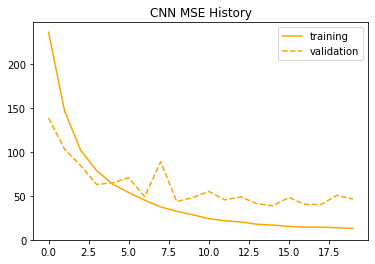

In [27]:
a = plt.plot(cnn_history.history['mse'], label='training', color='orange')
b = plt.plot(cnn_history.history['val_mse'], label='validation', color='orange', linestyle='dashed')
plt.legend()
plt.title("CNN MSE History")
ax = plt.gca()
ax.set_ylim(bottom=0)

(0.0, 251.39641904830933)

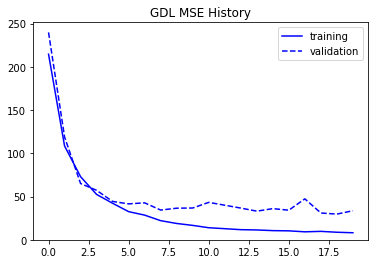

In [32]:
a = plt.plot(gdl_history.history['loss'], label='training', color='blue')
b = plt.plot(gdl_history.history['val_loss'], label='validation', color='blue', linestyle='dashed')
plt.legend()
plt.title("GDL MSE History")
ax = plt.gca()
ax.set_ylim(bottom=0)

(0.0, 247.14295454025267)

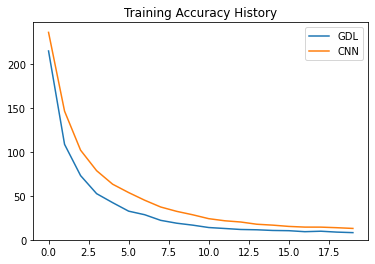

In [33]:
a = plt.plot(gdl_history.history['loss'], label='GDL')
b = plt.plot(cnn_history.history['loss'], label='CNN')
plt.legend()
plt.title("Training Accuracy History")
ax = plt.gca()
ax.set_ylim(bottom=0)

(0.0, 250.3187467575073)

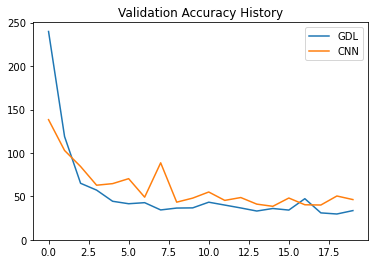

In [34]:
a = plt.plot(gdl_history.history['val_loss'], label='GDL')
b = plt.plot(cnn_history.history['val_loss'], label='CNN')
plt.title("Validation Accuracy History")
plt.legend()
ax = plt.gca()
ax.set_ylim(bottom=0)

In [35]:
gdl_model.evaluate(input_test_norm, output_test)

321/321 [==============================] - 7s 22ms/step - loss: 29.1550


29.154983520507812

In [36]:
cnn_model.evaluate(input_test_norm, output_test)

321/321 [==============================] - 1s 4ms/step - loss: 42.4115 - mse: 42.4115


[42.411495208740234, 42.411495208740234]

In [37]:
gdl_model.predict(input_test_norm[0:10])

1/1 [==============================] - 1s 554ms/step


array([[48.31944  , 32.811516 ],
       [ 7.3733935,  4.4756107],
       [39.303665 , 15.809913 ],
       [58.57603  , 29.748957 ],
       [70.94341  , 40.94939  ],
       [10.755832 ,  5.202314 ],
       [ 6.3949013,  5.893318 ],
       [19.41591  , 13.720695 ],
       [25.358322 , 21.613245 ],
       [37.821556 , 15.947485 ]], dtype=float32)

In [38]:
output_test.values[0:10]

array([[46.2951 , 33.50417],
       [12.46769,  4.5973 ],
       [38.82774, 18.47119],
       [66.35797, 27.92243],
       [84.71329, 44.87537],
       [ 7.53239,  5.83718],
       [ 7.57518,  4.35293],
       [18.29758, 12.91655],
       [26.08849, 22.84955],
       [38.38122, 14.56832]])

In [39]:
cnn_model.predict(input_test_norm[0:10])

1/1 [==============================] - 0s 80ms/step


array([[44.965252 , 30.779678 ],
       [ 8.305104 ,  9.116558 ],
       [38.1756   , 16.647547 ],
       [48.734524 , 27.444464 ],
       [64.67104  , 43.34193  ],
       [ 7.675877 ,  4.5476274],
       [ 8.747126 ,  4.9075165],
       [17.664366 , 11.894298 ],
       [29.974125 , 16.552942 ],
       [34.312008 , 18.813696 ]], dtype=float32)